#### Import modules

In [1]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objs as go

import datetime

import json

# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.io import loadmat

# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'
# sns.set_style('darkgrid')

In [2]:
# from unpack import unpack_detections

In [3]:
from viz import get_animation_data

#### Import detections

In [20]:
path = '../data/arbe_931_trail_bridge/'
file_name = 'arbe-rosbag_2021-02-12-14-04-08.pkl'
det_list = pd.read_pickle(path+file_name)

In [6]:
filtered_list = det_list

# filtered_list = filtered_list[filtered_list['Longitude'] > 311]
# filtered_list = filtered_list[filtered_list['Longitude'] < 318]
# filtered_list = filtered_list[filtered_list['LookType'] == 3]
# filtered_list = filtered_list[filtered_list['Speed'] > -13]
# filtered_list = filtered_list[filtered_list['Speed'] < 1.9]
# filtered_list = filtered_list[filtered_list['Azimuth'] > -8]
# filtered_list = filtered_list[filtered_list['Azimuth'] < 15]

filtered_list = filtered_list.reset_index()
# det_list = filtered_list

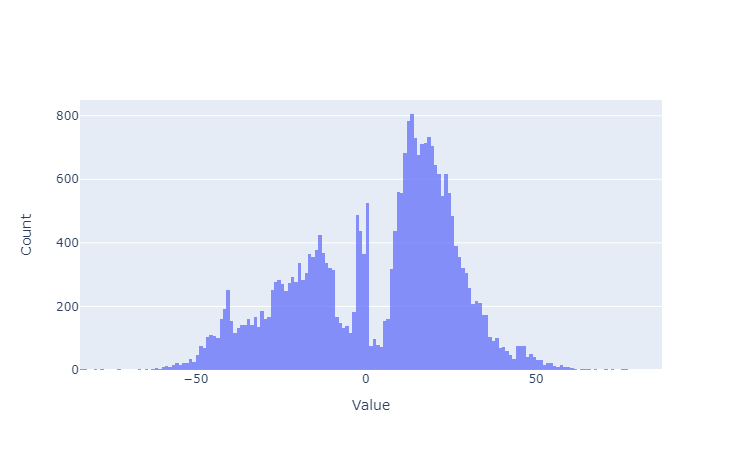

In [8]:
fig=go.Figure(dict(
    data=[dict(
        type='histogram',
        x=filtered_list['Azimuth'],
        histnorm='density',
        opacity=0.75,
    )],
    layout=dict(
        barmode='overlay',
        xaxis_title_text='Value', # xaxis label
        yaxis_title_text='Count', # yaxis label
        uirevision='no_change',
    )
))
fig.show()

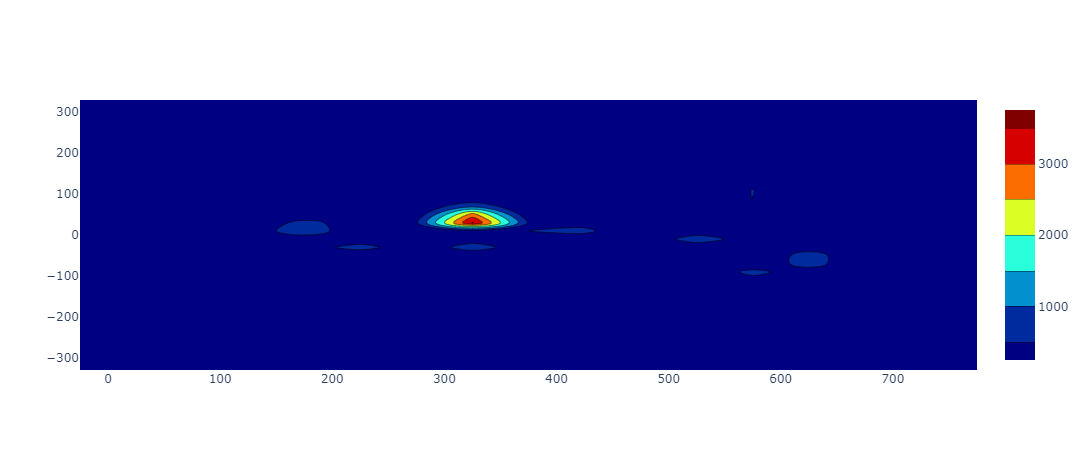

In [9]:
# fig = go.Figure(
#     go.Histogram2dContour(
#         x = filtered_list['Longitude'],
#         y = filtered_list['Latitude'],
#         colorscale = 'Jet'
# ))

fig = go.Figure(
    dict(
        type='histogram2dcontour',
        x = filtered_list['Longitude'],
        y = filtered_list['Latitude'],
        colorscale = 'Jet'
    )
)

fig.show()

In [4]:
def load_config(json_file):
    with open(json_file, 'r') as read_file:
        return json.load(read_file)

test_case = 'arbe_931_trail_bridge'
    
if os.path.exists('../data/'+test_case+'/config.json'):
    ui_config = load_config('../data/'+test_case+'/config.json')
else:
    ui_config = load_config('config.json')

num_keys = []
for idx, s_item in enumerate(ui_config['numerical']):
    num_keys.append(
        ui_config['numerical'][s_item]['key'])

cat_keys = []
for idx, d_item in enumerate(ui_config['categorical']):
    cat_keys.append(
        ui_config['categorical'][d_item]['key'])

keys_dict = {**ui_config['categorical'], **ui_config['numerical']}

In [21]:
fig = go.Figure(
    get_animation_data(
        det_list,
        x_key='Latitude',
        y_key='Longitude',
        z_key='Height',
        host_x_key='HostLatitude',
        host_y_key='HostLongitude',
        color_key='Power [dB]',
        hover_dict=keys_dict,
        db=False,
        colormap='Rainbow',
        height=700,
        title=file_name[:-4]
    )
)
fig.show()

now = datetime.datetime.now()
timestamp = now.strftime('%Y%m%d_%H%M%S')

fig.write_html('../data/'+test_case+'/images/' + file_name[:-4] +'_' +
                            timestamp+'_3dview.html')

## Batch

In [4]:
def load_config(json_file):
    with open(json_file, 'r') as read_file:
        return json.load(read_file)

test_case = 'arbe_931_trail_bridge'
    
if os.path.exists('../../../OneDrive - Aptiv/Road_Data/'+test_case+'/config.json'):
    ui_config = load_config('../../../OneDrive - Aptiv/Road_Data/'+test_case+'/config.json')
else:
    ui_config = load_config('config.json')

num_keys = []
for idx, s_item in enumerate(ui_config['numerical']):
    num_keys.append(
        ui_config['numerical'][s_item]['key'])

cat_keys = []
for idx, d_item in enumerate(ui_config['categorical']):
    cat_keys.append(
        ui_config['categorical'][d_item]['key'])

keys_dict = {**ui_config['categorical'], **ui_config['numerical']}

In [5]:
path = '../../../OneDrive - Aptiv/Road_Data/arbe_931_trail_bridge/'
# file_name = 'arbe-rosbag_2021-02-12-14-04-08.pkl'
# det_list = pd.read_pickle(path+file_name)

files = [f for f in os.listdir(
    path) if os.path.isfile(os.path.join(path, f))]

for f in files:
    file_name=f
    
    if file_name[-3:] == 'pkl':
    
        det_list = pd.read_pickle(path+file_name)
        filtered_list = det_list

        filtered_list = filtered_list[filtered_list['Power [dB]'] > 54]
        # filtered_list = filtered_list[filtered_list['Longitude'] < 318]
        # filtered_list = filtered_list[filtered_list['LookType'] == 3]
        # filtered_list = filtered_list[filtered_list['Speed'] > -13]
        # filtered_list = filtered_list[filtered_list['Speed'] < 1.9]
        # filtered_list = filtered_list[filtered_list['Azimuth'] > -8]
        # filtered_list = filtered_list[filtered_list['Azimuth'] < 15]

        filtered_list = filtered_list.reset_index()

        fig = go.Figure(
            get_animation_data(
                filtered_list,
                x_key='Latitude',
                y_key='Longitude',
                z_key='Height',
                host_x_key='HostLatitude',
                host_y_key='HostLongitude',
                color_key='Power [dB]',
                hover_dict=keys_dict,
                db=False,
                colormap='Rainbow',
                height=700,
                title=file_name[:-4]
            )
        )
    #     fig.show()

        now = datetime.datetime.now()
        timestamp = now.strftime('%Y%m%d_%H%M%S')

        fig.write_html('../../../OneDrive - Aptiv/Road_Data/'+test_case+'/images/' + file_name[:-4] +'_' +
                                    timestamp+'_3dview.html')